In [83]:
import pandas as pd
import seaborn as sns

# Chargement des données

In [84]:
data = pd.read_csv("conversion_data.csv")

In [85]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [86]:
data.shape

(316200, 6)

In [87]:
data.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [88]:
data.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

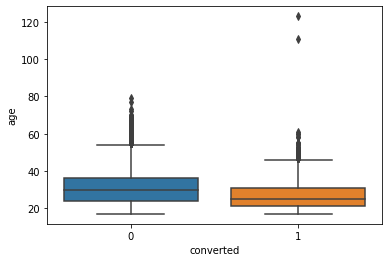

In [89]:
sns.boxplot('converted', 'age', data=data)

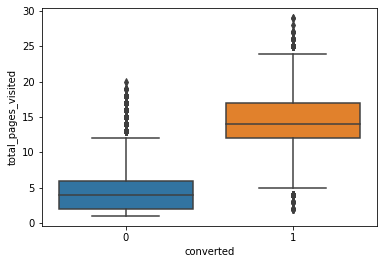

In [90]:
sns.boxplot('converted', 'total_pages_visited', data=data)

In [91]:
data["country"].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [92]:
data["source"].value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

In [93]:
data2 = pd.get_dummies(data, columns=['country','source'], drop_first=True)

In [94]:
data2.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


In [95]:
X = data2.loc[:,['age','new_user','total_pages_visited','country_Germany', 'country_UK','country_US','source_Direct','source_Seo']]

In [96]:
y = data2.loc[:,["converted"]]

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=4)

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train.values.ravel())
lr.score(X_train,y_train)

0.9861993991144845

In [112]:
lr.score(X_test, y_test)

0.986021505376344